# Document Filtering

# Linear Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

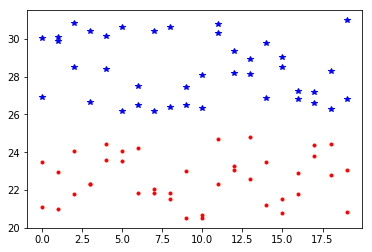

In [3]:
n = 20
x1 = (np.random.rand(n, 2)*5)+26
x2 = (np.random.rand(n,2)*5) +20
plt.plot(x1, 'b*')
plt.plot(x2, 'r.')

Bayesian Decision Boundary - Where dist to mean is the same

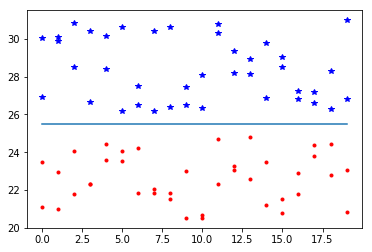

In [4]:
m1 = np.mean(x1)
m2 = np.mean(x2)
d = (m1 + m2)/2; yd = np.ones(n)*d; xd = range(n)
plt.plot(xd, yd); plt.plot(x1, 'b*'); plt.plot(x2, 'r.')

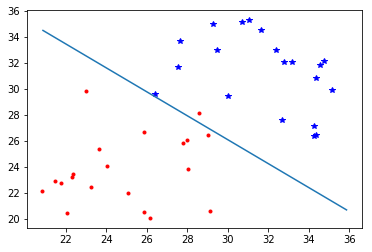

In [5]:
n = 20
x1 = (np.random.rand(n, 2)*10)+26
x2 = (np.random.rand(n,2)*10) +20
m1 = np.mean(x1, axis=0); m2 = np.mean(x2, axis=0)
p1 = np.mean([m1,m2], axis=0)
p2 = p1 + [-m1[1] + m2[1],m1[0] - m2[0]]
p3 = p1 - [-m1[1] + m2[1],m1[0] - m2[0]]
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.')
plt.plot([p2[0],p3[0]],[ p2[1], p3[1]])

In [6]:
# turn data in to training data
from sklearn.model_selection import train_test_split
X1 = np.array([(x[0], x[1],0) for x in x1]); X2 = np.array([(x[0],x[1],1) for x in x2])
X = np.concatenate([X1, X2])
X_data = pd.DataFrame(X[:,:2])
y_data = pd.DataFrame(X[:,2], dtype=int)

y_data = pd.get_dummies(y_data[0])# changes category label to one hot encoding
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data)


In [ ]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import optimizers

model = Sequential([
    Dense(16, input_shape=(2,)), Activation('sigmoid'),
    Dense(2), Activation('sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy', # For a binary classification problem
              metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10000, verbose=0)
score = model.evaluate(x_test, y_test)
print(score)

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.argmax(axis=1)
Z = Z.reshape(xx.shape)
plt.scatter(x1[:,0],x1[:,1],marker='*',c='b',s=5)
plt.scatter(x2[:,0],x2[:,1],marker='o',c='r',s=5)
CS = plt.contour(xx, yy, Z,  levels=[0.5])

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
y_data = np.argmax(np.array(y_data), axis=1)
clf.fit(X_data, y_data)

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(x1[:,0],x1[:,1],marker='*',c='b',s=5)
plt.scatter(x2[:,0],x2[:,1],marker='o',c='r',s=5)
CS = plt.contour(xx, yy, Z,  levels=[0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 20
x1 = (np.random.rand(n, 2)*7)+26
x2 = (np.random.rand(n,2)*7) +20
plt.scatter(x1[:,0],x1[:,1],marker='*',c='b',s=5)
plt.scatter(x2[:,0],x2[:,1],marker='o',c='r',s=5)

In [ ]:
# add bias column to data
bias_col = np.ones((n,1))
x1 = np.column_stack([x1, bias_col])
x2 = np.column_stack([x2, bias_col])
X_data = np.row_stack([x1, x2])
y1 = bias_col
y2 = -1*bias_col
Y_data = np.row_stack([y1, y2])


In [ ]:
w = np.random.normal(size=(3,1))
x =  np.linspace(20, 34, 10)
runs = 1000
eta = 0.1


In [ ]:
n = 20
np.random.seed(12345)
x1 = (np.random.rand(n, 2)*10)+26
x2 = (np.random.rand(n,2)*10) +20
x3 = (np.multiply(np.random.rand(n,2),[5,10]))+[20,28]

m1 = np.mean(x1, axis=0); m2 = np.mean(x2, axis=0);m3 = np.mean(x3,axis=0)
p1 = np.mean([m1,m2], axis=0)
p2 = p1 + [-m1[1] + m2[1],m1[0] - m2[0]]
p3 = p1 - [-m1[1] + m2[1],m1[0] - m2[0]]
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'mv')
plt.plot([p2[0],p3[0]],[ p2[1], p3[1]])

In [ ]:
def plot_dist_mean_line(m1, m2, c):
    p1 = np.mean([m1,m2], axis=0)
    p2 = p1 + [-m1[1] + m2[1],m1[0] - m2[0]]
    p3 = p1 - [-m1[1] + m2[1],m1[0] - m2[0]]

    plt.plot([p2[0],p3[0]],[ p2[1], p3[1]],c)
    

In [ ]:
n = 20
np.random.seed(12345)
x1 = (np.random.rand(n, 2)*10)+26
x2 = (np.random.rand(n,2)*10) +20
x3 = (np.multiply(np.random.rand(n,2),[5,10]))+[20,28]

m1 = np.mean(x1, axis=0); m2 = np.mean(x2, axis=0);m3 = np.mean(x3,axis=0)
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'gv')
plot_dist_mean_line(m1, m2, 'm')
plot_dist_mean_line(m1,m3,'c')
plot_dist_mean_line(m2,m3,'y')

In [ ]:

plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.');plt.plot(x3[:,0],x3[:,1], 'gv')
plot_dist_mean_line(m1, (m2+m3)/2, 'y')
plot_dist_mean_line(m2,(m1+m3)/2,'c')
plot_dist_mean_line(m3,(m1+m2)/2,'m')

# Part of Speech tagging

In [3]:
import nltk
nltk.download('punkt')
sentence = "The quick brown fox jumped over the lazy dog"
tokens = nltk.word_tokenize(sentence)
print(tokens)

[nltk_data] Downloading package punkt to /Users/jojo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [6]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(tokens)
print(pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jojo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumped', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]


In [16]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(sentence)
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumped/VBD
  over/IN
  (NP the/DT lazy/JJ dog/NN))


# Named Entity Extraction

In [28]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
sentence1 = "but unfortunately for MSC Bellissima, the British weather intervened."
sent1 = preprocess(sentence1)
ne_tree1 = nltk.ne_chunk(sent1)
print(ne_tree1)

(S
  but/CC
  unfortunately/RB
  for/IN
  (ORGANIZATION MSC/NNP Bellissima/NNP)
  ,/,
  the/DT
  (GPE British/JJ)
  weather/NN
  intervened/VBD
  ./.)


In [29]:
sentence2="MSC chairman Pierfrancesco Vago walked out on stage while his CEO Gianni Onorato was speaking."
sent2 = preprocess(sentence2)
ne_tree2 = nltk.ne_chunk(sent2)
print(ne_tree2)

(S
  (ORGANIZATION MSC/NNP)
  chairman/NN
  (PERSON Pierfrancesco/NNP Vago/NNP)
  walked/VBD
  out/RP
  on/IN
  stage/NN
  while/IN
  his/PRP$
  (ORGANIZATION CEO/NNP Gianni/NNP Onorato/NNP)
  was/VBD
  speaking/VBG
  ./.)


In [ ]:
Using these tools 